# Design image filters to get better understanding and presentation of filtering. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from cv2 import filter2D

In [2]:
!wget -O 'input.jpg' 'https://home.iitd.ac.in/images/slider/slide1.jpg'

--2023-08-13 23:07:53--  https://home.iitd.ac.in/images/slider/slide1.jpg
Resolving home.iitd.ac.in (home.iitd.ac.in)... 2001:df4:e000:29::212, 10.10.211.212
Connecting to home.iitd.ac.in (home.iitd.ac.in)|2001:df4:e000:29::212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315011 (308K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 307.63K  --.-KB/s    in 0.03s   

2023-08-13 23:07:53 (9.22 MB/s) - ‘input.jpg’ saved [315011/315011]



In [3]:
image_path = 'input.jpg'
img = np.array(Image.open(image_path))

In [4]:
def save_img(np_img, name):
    pillow_img = Image.fromarray(np.uint8(np_img)).convert('RGB')
    pillow_img.save(name+'.png')
#     display(pillow_img)

In [5]:
save_img(img, 'original')

In [6]:
filters = {
    'identity': np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]),
    'blur': np.ones((3, 3))/(3*3),
    'large_blur': np.ones((25, 25))/(25*25),
    'sobel': np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]),
    'laplacian': np.array([
        [0, 1, 0],
        [1,-4, 1],
        [0, 1, 0]
    ]),
    'high_pass': np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ]),
    'low_pass': np.array([
        [0, 1, 0],
        [1, -3, 1],
        [0, 1, 0]
    ]),
}

In [7]:
plt.figure(figsize=(10,4))
def apply_filter(img, kernel_name, idx):
    out = filter2D(src=img, ddepth=-1, kernel=filters[kernel_name])
    save_img(out, kernel_name)
    plt.subplot(2, 4, idx)
    plt.imshow(out)
    plt.title(kernel_name)
    plt.axis('off')

<Figure size 1000x400 with 0 Axes>

## a. Design images using  identify_filter, blur_filter, large_blur_filter, sobel_filter, laplacian_filter, and high_pass_filter. 
## b. Use these filters to make high-frequency and low-frequency images.
## c. Can you construct the hybrid image by combining the filtered high-frequency and low-frequency images?

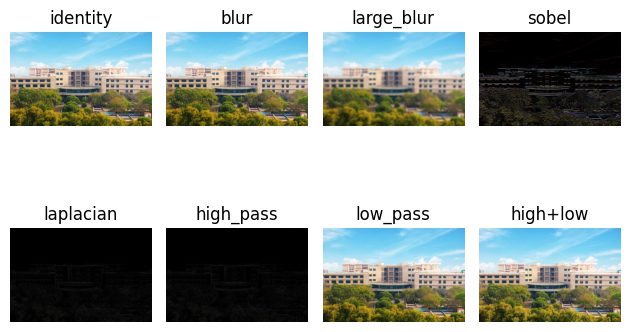

In [9]:
# a. Design images using  identify_filter, blur_filter, large_blur_filter, sobel_filter, laplacian_filter, and high_pass_filter. 
apply_filter(img, 'identity', 1)
apply_filter(img, 'blur', 2)
apply_filter(img, 'large_blur', 3)
apply_filter(img, 'sobel', 4)
apply_filter(img, 'laplacian', 5)

# b. Use these filters to make high-frequency and low-frequency images.
apply_filter(img, 'high_pass', 6)
apply_filter(img, 'low_pass', 7)

# c. Can you construct the hybrid image by combining the filtered high-frequency and low-frequency images?
high= filter2D(src=img, ddepth=-1, kernel=filters['high_pass'])
low = filter2D(src=img, ddepth=-1, kernel=filters['low_pass'])
plt.subplot(2,4,8)
plt.imshow(high+low)
plt.title('high+low')
plt.axis('off')

# We have successfully reconstructed the hybrid image by adding high pass and low pass image
plt.tight_layout()

## d. Experiment with your own image and your loved pet’s image. 

(-0.5, 299.5, 299.5, -0.5)

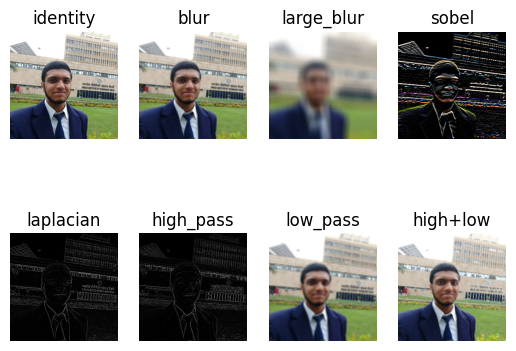

In [10]:
# d. Experiment with your own image and your loved pet’s image. 
me = np.array(Image.open('me.jpg'))
apply_filter(me, 'identity', 1)
apply_filter(me, 'blur', 2)
apply_filter(me, 'large_blur', 3)
apply_filter(me, 'sobel', 4)
apply_filter(me, 'laplacian', 5)
apply_filter(me, 'high_pass', 6)
apply_filter(me, 'low_pass', 7)

high= filter2D(src=me, ddepth=-1, kernel=filters['high_pass'])
low = filter2D(src=me, ddepth=-1, kernel=filters['low_pass'])
plt.subplot(2,4,8)
plt.imshow(high+low)
plt.title('high+low')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

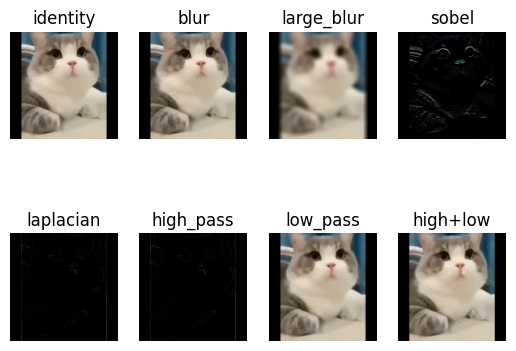

In [11]:
# d. Experiment with your own image and your loved pet’s image. 
me = np.array(Image.open('cat.jpg'))
apply_filter(me, 'identity', 1)
apply_filter(me, 'blur', 2)
apply_filter(me, 'large_blur', 3)
apply_filter(me, 'sobel', 4)
apply_filter(me, 'laplacian', 5)
apply_filter(me, 'high_pass', 6)
apply_filter(me, 'low_pass', 7)

high= filter2D(src=me, ddepth=-1, kernel=filters['high_pass'])
low = filter2D(src=me, ddepth=-1, kernel=filters['low_pass'])
plt.subplot(2,4,8)
plt.imshow(high+low)
plt.title('high+low')
plt.axis('off')

## Conclusion: 
- The identity filter returns the image as it is.
- The blur filter uses box which averages the neighbourhood of the pixel and softens it
- The large blur makes the blur effect more noticeable
- Sobel filter gives us the horizontal edges
- Laplacian tells us wherever the pixel value is changing across the edges
- The high pass filter highlights the areas where a lot of pixels are changing rapidly, while the low pass filter highlights the softer regions
- High Pass + Low Pass = Identity, so it can be constructed back
- We have observed the results using my own image and a cat's image.